<a href="https://colab.research.google.com/github/r-diazp/DeepL/blob/master/best_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
#Funtions  
def plot_decision_boundary(model, X, y, figsize=(10, 7)):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.figure(figsize=(10, 7))
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  # Plot the learning rate versus the loss
def best_learning_rate(model, epochs, figsize=(10, 7) ):
  lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
  plt.figure(figsize=figsize)
  plt.semilogx(lrs, model.history["loss"]) # we want the x-axis (learning rate) to be log scale
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");

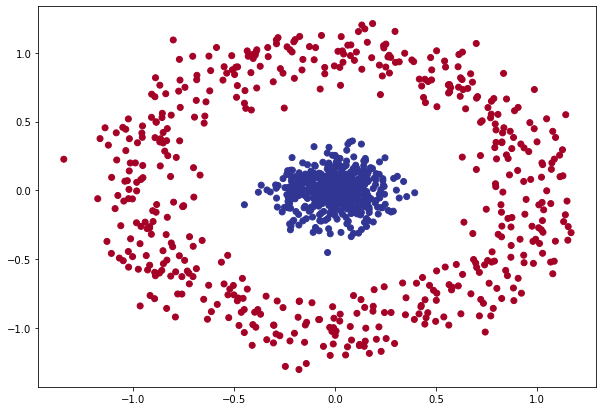

In [3]:
# Make 1000 examples
n_samples = 1000

# Create dataset
X_train, y_train = make_circles(n_samples=n_samples, 
                                factor=0.01, 
                                noise=0.13, 
                                random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

Create the model

In [14]:
# 1. Set random seed
tf.random.set_seed(50)

# 2. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="tanh"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['accuracy'])

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.6560
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9820
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9990


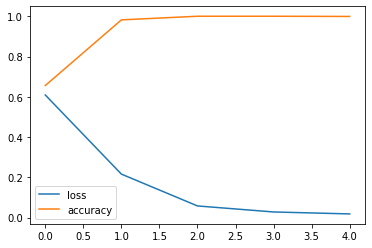

In [15]:
# 4- Fit he model
epochs = 5
model_history = model.fit(X_train, y_train,
                          epochs=epochs,
                          verbose=1)

# Plot history trainning 
pd.DataFrame(model_history.history).plot()

learning rate scheduler callback

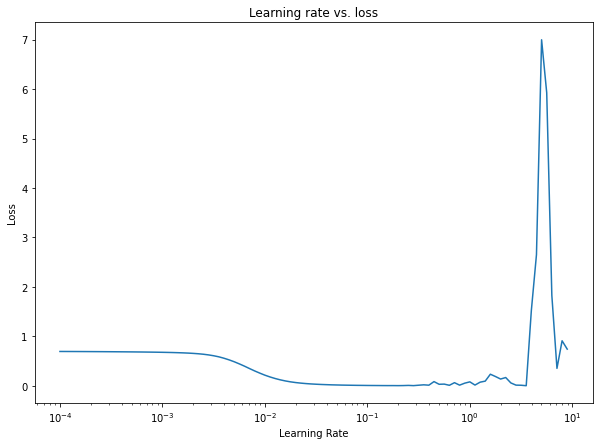

In [10]:
# 4- Fit the model and create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_history = model.fit(X_train, y_train,
                          epochs=epochs,
                          verbose=0, 
                          callbacks=[lr_scheduler])


best_learning_rate(model_history, epochs)

doing binary classifcation...


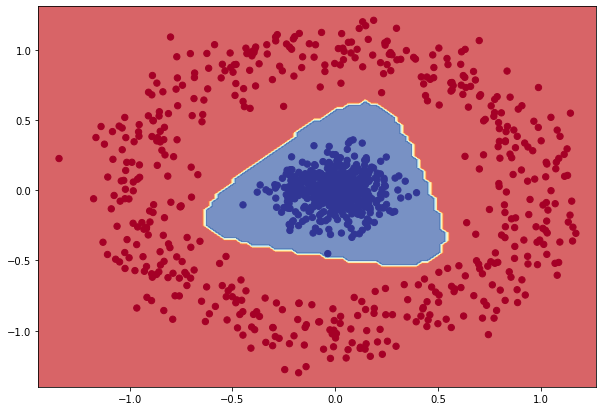

In [16]:
plot_decision_boundary(model, X_train, y_train)